# 1. IMPORT LIBRARIES

In [104]:
import numpy as np
import pandas as pd
import sys
print('Python version: {}'.format(sys.version))
print('Numpy: {}'.format(np.version))
print('Pandas: {}'.format(pd.__version__))

Python version: 3.10.4 | packaged by conda-forge | (main, Mar 30 2022, 08:38:02) [MSC v.1916 64 bit (AMD64)]
Numpy: <module 'numpy.version' from 'c:\\Users\\PandiyaDS\\anaconda3\\envs\\env1\\lib\\site-packages\\numpy\\version.py'>
Pandas: 1.4.2


In [137]:
# ML packages
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
# Data Pre-processing
from sklearn.preprocessing import StandardScaler

In [106]:
# Visual
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as plx
%matplotlib inline

In [107]:
# File system
import os
from os import listdir
from os.path import isfile, join
# Warning
import warnings
warnings.filterwarnings('ignore')

# 2. READ DATA

In [108]:
df = pd.read_csv('trainKNN.txt', header=None)
df.columns = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'TypeOfGlass']
df.head()
# 1. ID number: 1 to 214
# 2. RI: refractive index
# 3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
# 4. Mg: Magnesium
# 5. Al: Aluminum
# 6. Si: Silicon
# 7. K: Potassium
# 8. Ca: Calcium
# 9. Ba: Barium
# 10. Fe: Iron
# 11. Type of glass: (class attribute)
# -- 1 building_windows_float_processed
# -- 2 building_windows_non_float_processed
# -- 3 vehicle_windows_float_processed
# -- 4 vehicle_windows_non_float_processed (none in this database)
# -- 5 containers
# -- 6 tableware
# -- 7 headlamps

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,TypeOfGlass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [109]:
df.shape

(196, 11)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           196 non-null    int64  
 1   RI           196 non-null    float64
 2   Na           196 non-null    float64
 3   Mg           196 non-null    float64
 4   Al           196 non-null    float64
 5   Si           196 non-null    float64
 6   K            196 non-null    float64
 7   Ca           196 non-null    float64
 8   Ba           196 non-null    float64
 9   Fe           196 non-null    float64
 10  TypeOfGlass  196 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 17.0 KB


In [111]:
df.isnull().sum()

ID             0
RI             0
Na             0
Mg             0
Al             0
Si             0
K              0
Ca             0
Ba             0
Fe             0
TypeOfGlass    0
dtype: int64

In [112]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
ID,196.0,102.86,61.20,1.00,49.75,101.50,153.25,211.00
RI,196.0,1.52,0.00,1.51,1.52,1.52,1.52,1.53
Na,196.0,13.38,0.78,10.73,12.88,13.28,13.79,15.79
Mg,196.0,2.76,1.39,0.00,2.36,3.48,3.61,4.49
Al,196.0,1.45,0.49,0.29,1.19,1.36,1.62,3.50
Si,196.0,72.64,0.76,69.81,72.32,72.81,73.08,75.18
K,196.0,0.52,0.67,0.00,0.14,0.56,0.61,6.21
Ca,196.0,8.91,1.42,5.43,8.22,8.57,9.09,16.19
Ba,196.0,0.16,0.49,0.00,0.00,0.00,0.00,3.15
Fe,196.0,0.05,0.09,0.00,0.00,0.00,0.09,0.34


Observation
--------------
1. Rows: 196 and Columns: 11
2. Non of the column have Null values.
3. All columns have data type float or int type.
4. All features are in different ranges, need to normalize and standardize it.

# 3. DATA PRE-PROCESSING

## 3.1 Data Distribution

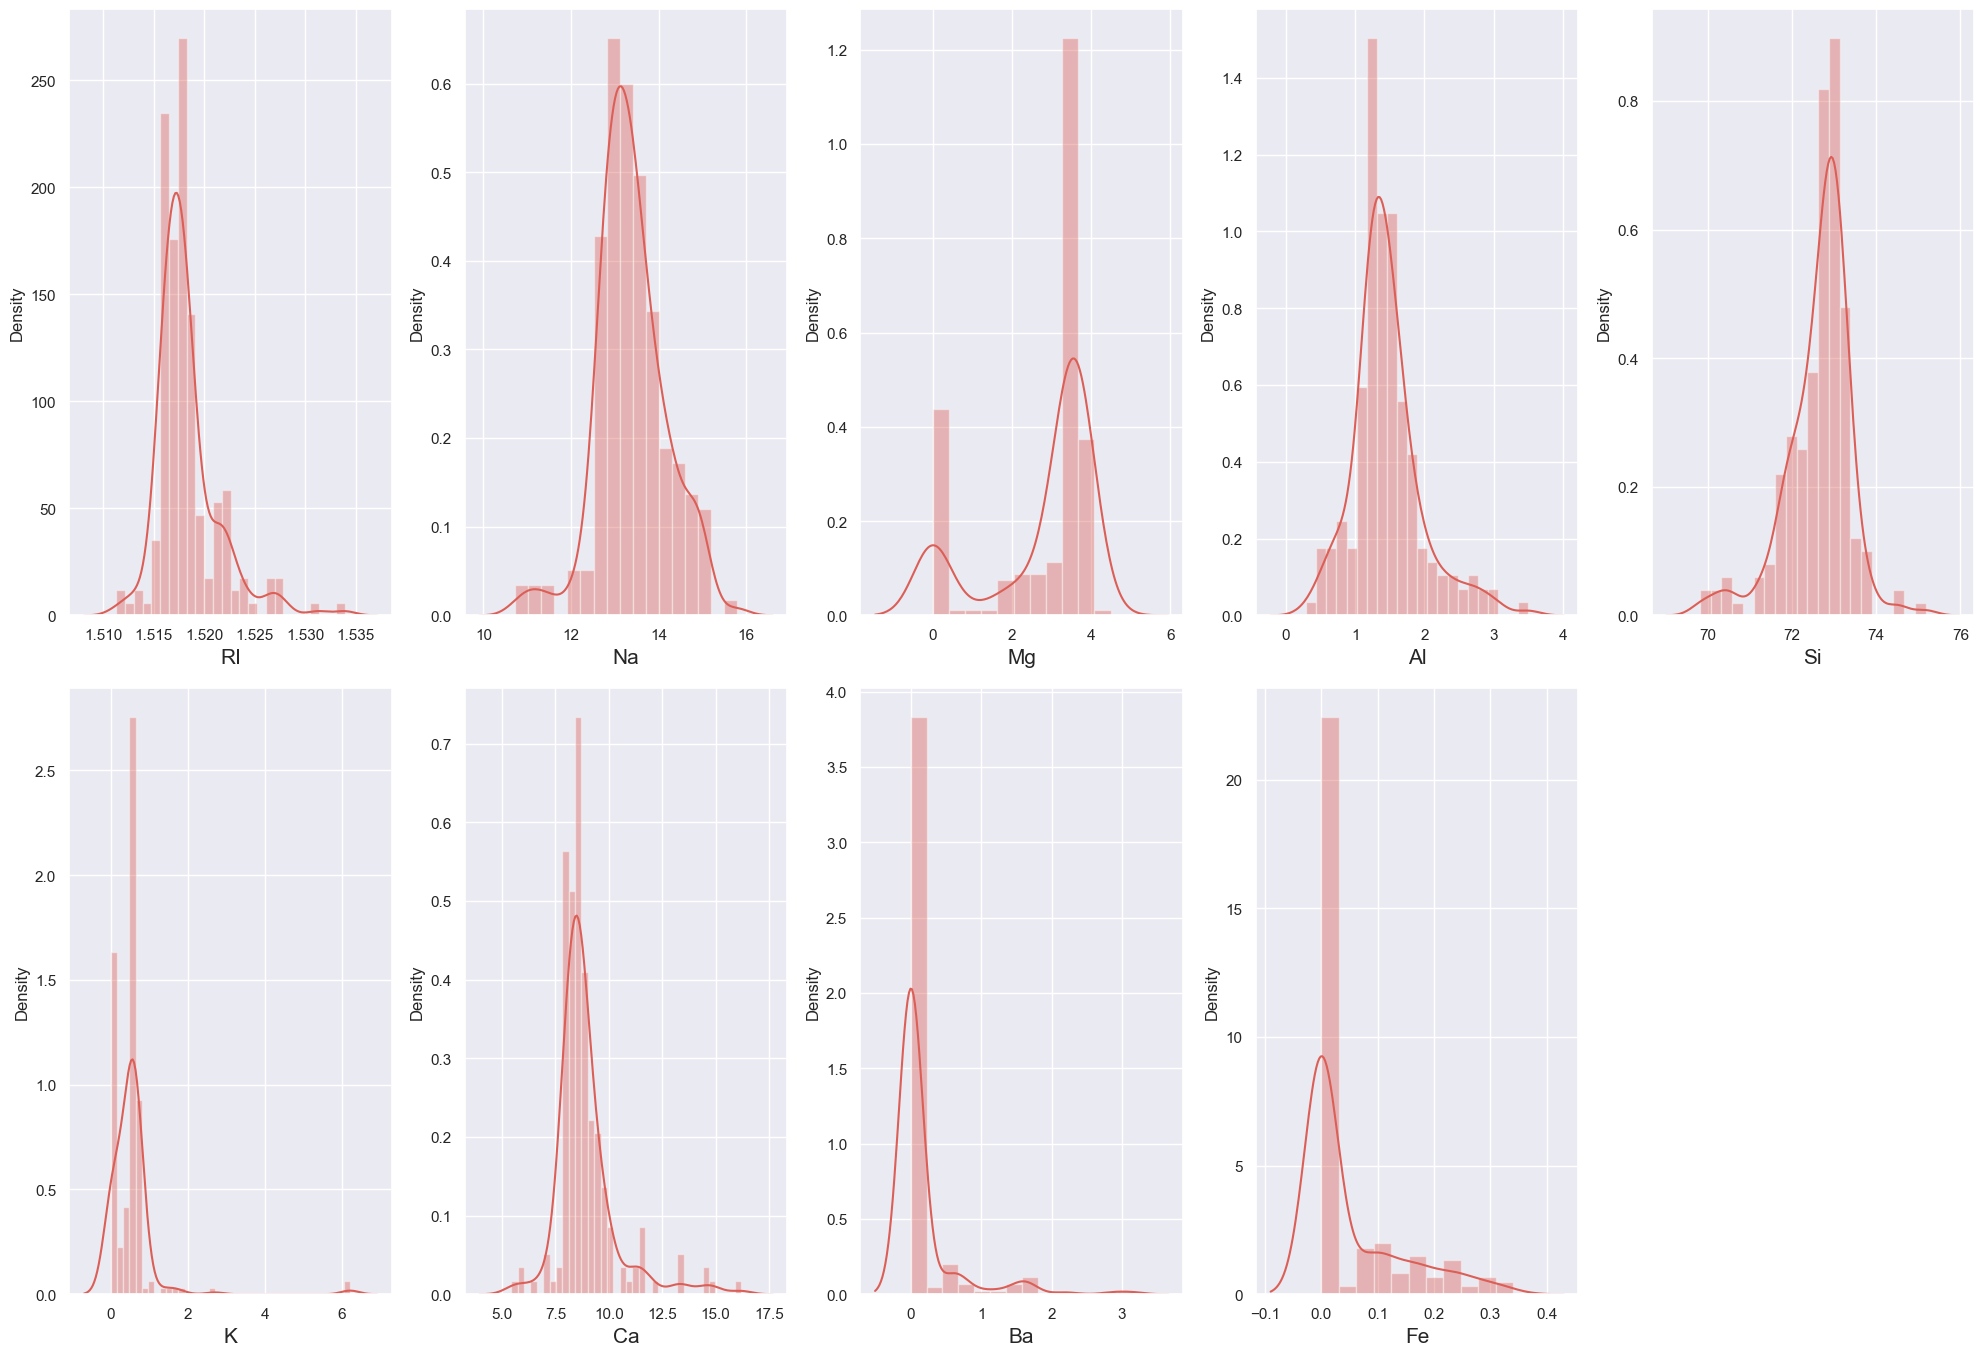

In [113]:
# Frequency (Density) plot for all features and check for improvement
plt.figure(figsize=(20, 20))
pltnumber = 1

for column in df.iloc[:, 1:-1]:
    if pltnumber <= 14:
        ax = plt.subplot(3, 5, pltnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=15)
    pltnumber += 1
plt.tight_layout()
plt.show()

## 3.2 Outliers

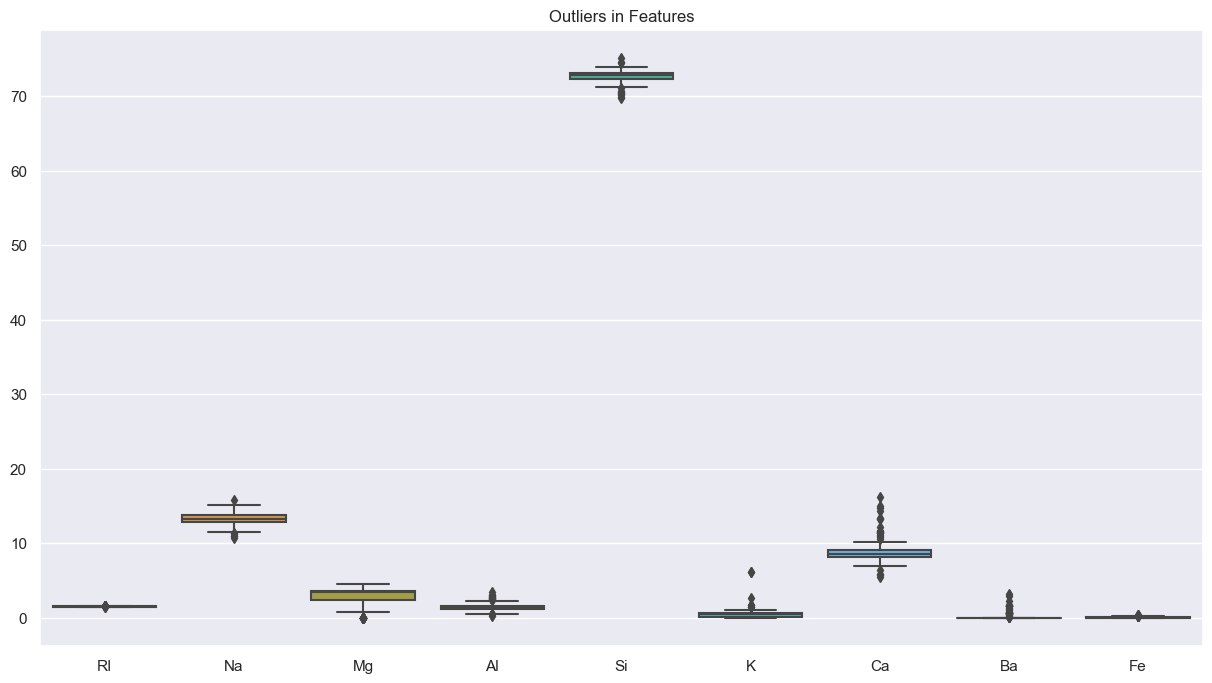

Column RI outliers = 8.16%
Column Na outliers = 3.06%
Column Mg outliers = 17.86%
Column Al outliers = 8.67%
Column Si outliers = 6.12%
Column K outliers = 3.57%
Column Ca outliers = 11.22%
Column Ba outliers = 100.00%
Column Fe outliers = 7.14%
Column TypeOfGlass outliers = 16.33%


In [114]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.iloc[:, 1:-1])
plt.title('Outliers in Features')
plt.show()

# Interquartile range
for k, v in df.iloc[:, 1:].items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5*irq) | (v >= q3 + 1.5*irq)]
    prec = np.shape(v_col)[0] * 100 / np.shape(df.iloc[:, 1:-1])[0]
    print('Column %s outliers = %.2f%%' % (k, prec))

In [115]:
df.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,TypeOfGlass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## 3.3 Standarization

In [116]:
def scaler(train):
    scaler = StandardScaler()
    scl_train = scaler.fit_transform(train)
    return scl_train

df.iloc[:, 1:-1] = scaler(df.iloc[:, 1:-1])
df.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,TypeOfGlass
0,1,0.890812,0.338985,1.246160,-0.722499,-1.123132,-0.684647,-0.113350,-0.339357,-0.583422,1
1,2,-0.224796,0.659028,0.605450,-0.192354,0.124197,-0.058701,-0.762215,-0.339357,-0.583422,1
2,3,-0.694007,0.198166,0.569455,0.174669,0.465571,-0.192833,-0.797480,-0.339357,-0.583422,1
3,4,-0.208390,-0.211490,0.670241,-0.335086,-0.033360,0.075430,-0.487153,-0.339357,-0.583422,1
4,5,-0.287138,-0.134679,0.619848,-0.437037,0.583739,0.045623,-0.592946,-0.339357,-0.583422,1


In [117]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,196.0,1.028622e+02,61.195663,1.000000,49.750000,101.500000,153.250000,211.000000
RI,196.0,-1.022105e-13,1.002561,-2.291951,-0.602954,-0.218233,0.226369,5.130121
Na,196.0,-1.877183e-15,1.002561,-3.386320,-0.637148,-0.121878,0.534211,3.091358
Mg,196.0,6.570708e-17,1.002561,-1.986187,-0.285425,0.519062,0.612649,1.246160
Al,196.0,1.359457e-17,1.002561,-2.374104,-0.538988,-0.192354,0.342888,4.171146
Si,196.0,-5.798083e-15,1.002561,-3.709697,-0.417406,0.229235,0.583739,3.340991
K,196.0,-2.265761e-18,1.002561,-0.774067,-0.565419,0.060526,0.135044,8.480981
Ca,196.0,-5.522793e-16,1.002561,-2.454908,-0.487153,-0.236775,0.128211,5.133997
Ba,196.0,7.658273e-16,1.002561,-0.339357,-0.339357,-0.339357,-0.339357,6.169460
Fe,196.0,-1.835267e-16,1.002561,-0.583422,-0.583422,-0.583422,0.461407,3.363711


# 4. FEATURE ENGINEERING

## 4.1 Dimensionality Reduction

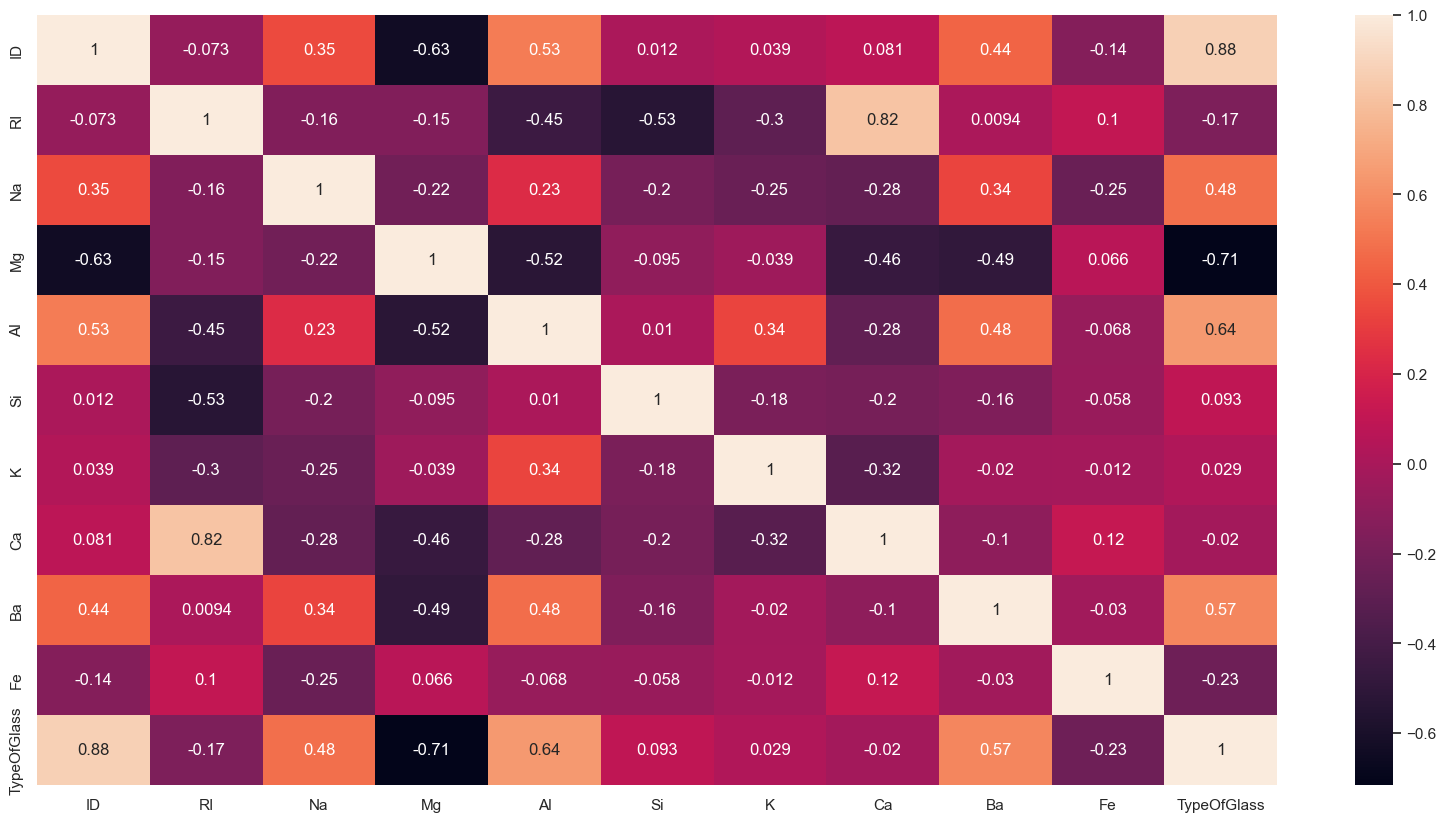

In [118]:
# Correlation Heat map
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

### 4.1.1 K & Ca column Analysis

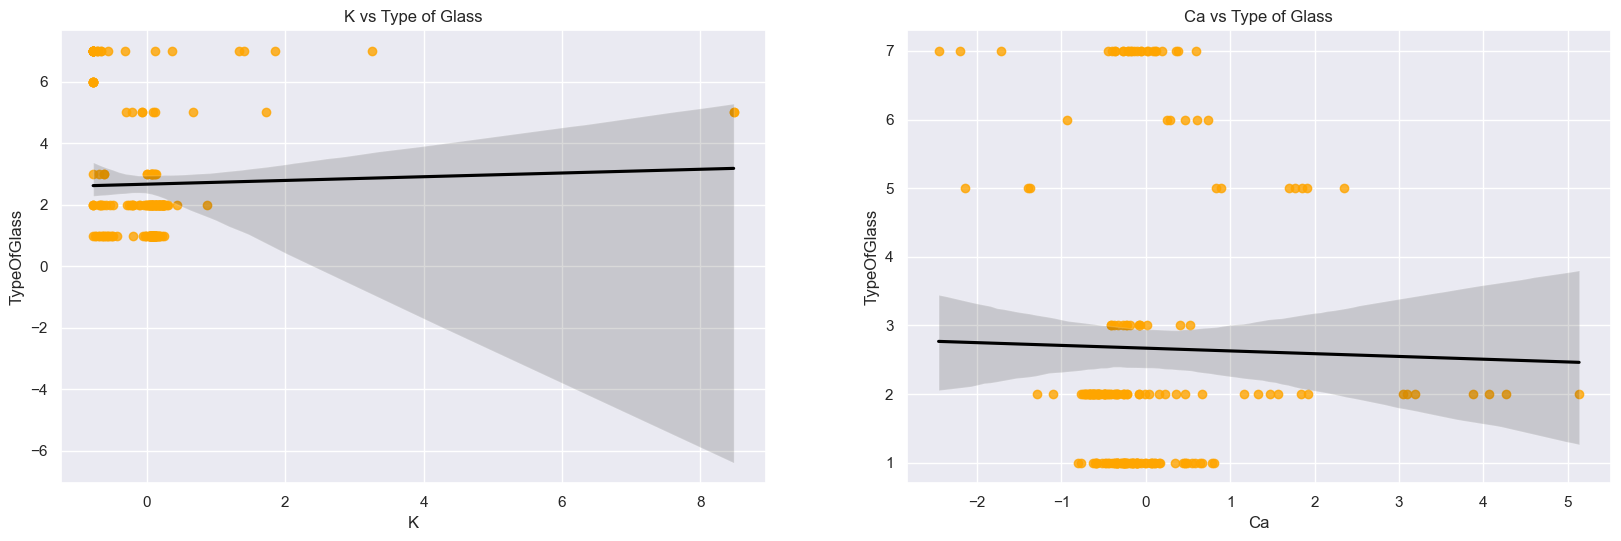

In [119]:
# Scatter plot between K & Ca vs Type of Glass
plt.figure(figsize=(20, 20))
plt.subplot(321)
sns.regplot(x=df.K, y=df.TypeOfGlass, scatter_kws={'color':'orange'}, line_kws={'color':'black'})
plt.title('K vs Type of Glass')

plt.subplot(322)
sns.regplot(x=df.Ca, y=df.TypeOfGlass, scatter_kws={'color':'orange'}, line_kws={'color':'black'})
plt.title('Ca vs Type of Glass')

plt.show()


Observation
--------------
1. Correlation of K & Ca with respect to Type of Glass is less than 5%.
2. Regression line almost flat indicating that K & Ca are almost most independent with respect to Type of Glass.
3. ID, K & Ca can be removed from data frame.

## 4.2 Dropping columns

In [120]:
# Drop unnecessary columns ID, K, Ca
df.drop(columns=['ID', 'K', 'Ca'], inplace=True)
df.head()

,RI,Na,Mg,Al,Si,Ba,Fe,TypeOfGlass
0,0.890812,0.338985,1.246160,-0.722499,-1.123132,-0.339357,-0.583422,1
1,-0.224796,0.659028,0.605450,-0.192354,0.124197,-0.339357,-0.583422,1
2,-0.694007,0.198166,0.569455,0.174669,0.465571,-0.339357,-0.583422,1
3,-0.208390,-0.211490,0.670241,-0.335086,-0.033360,-0.339357,-0.583422,1
4,-0.287138,-0.134679,0.619848,-0.437037,0.583739,-0.339357,-0.583422,1


In [121]:
df.shape # Three columns removed

(196, 8)

# 5. EXPLORATORY DATA ANALYSIS

## 5.1 Scatter Plot for Type of Glass vs Features

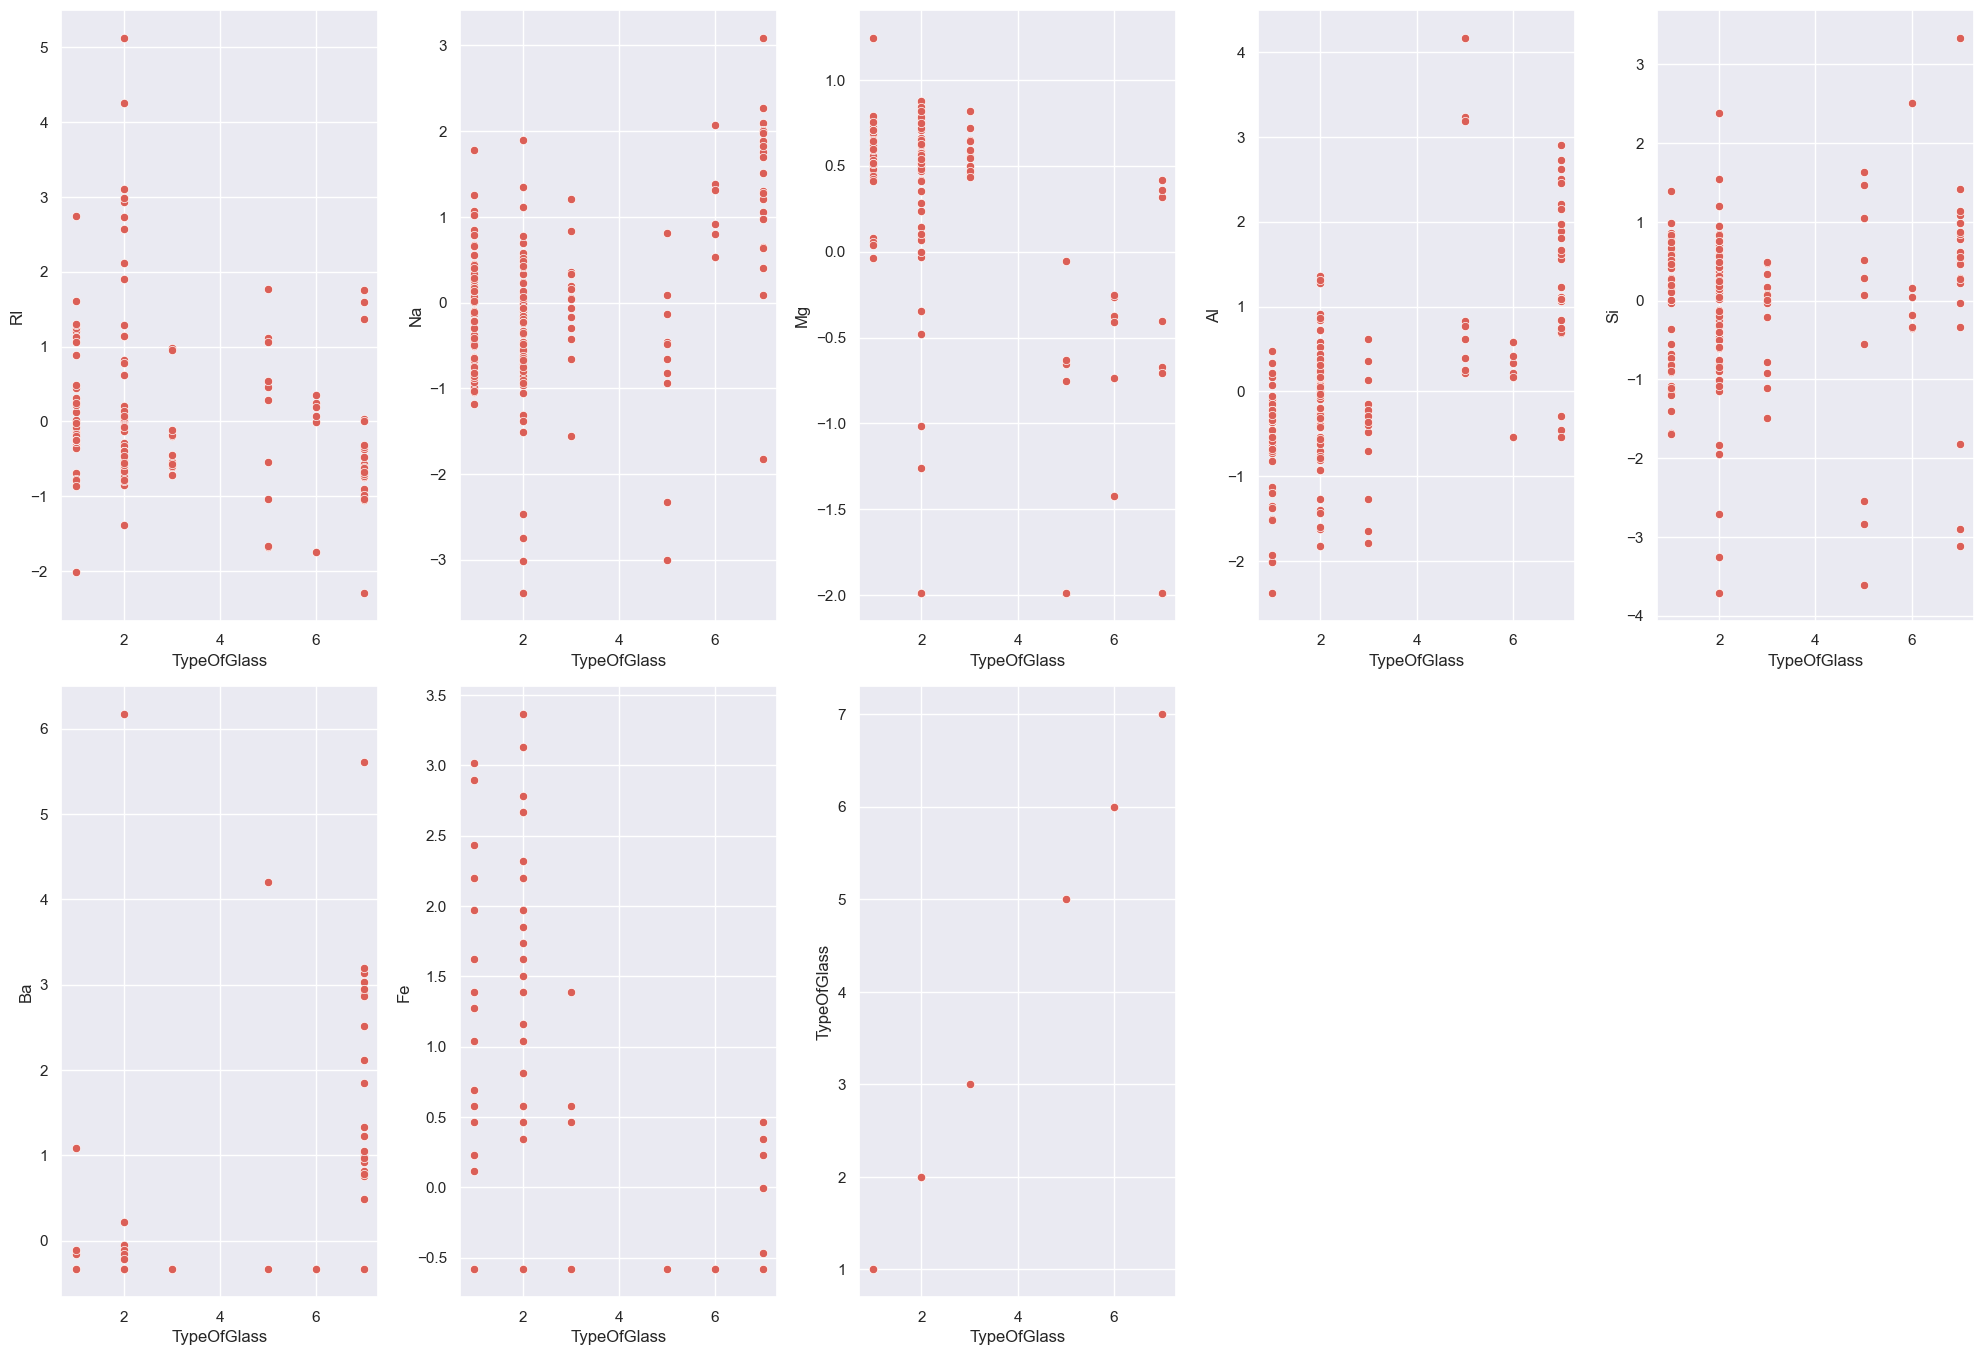

In [122]:
# Scatter Plot b/w Features & Type of Glass
plt.figure(figsize=(20, 20))
pltnumber = 1

for column in df.iloc[:, :]:
    if pltnumber <= 8:
        ax = plt.subplot(3, 5, pltnumber)
        sns.scatterplot(x=df.TypeOfGlass, y=df[column])
    pltnumber += 1
plt.tight_layout()
plt.show()

## 5.2 Correlation b/w Features & Type of Glass

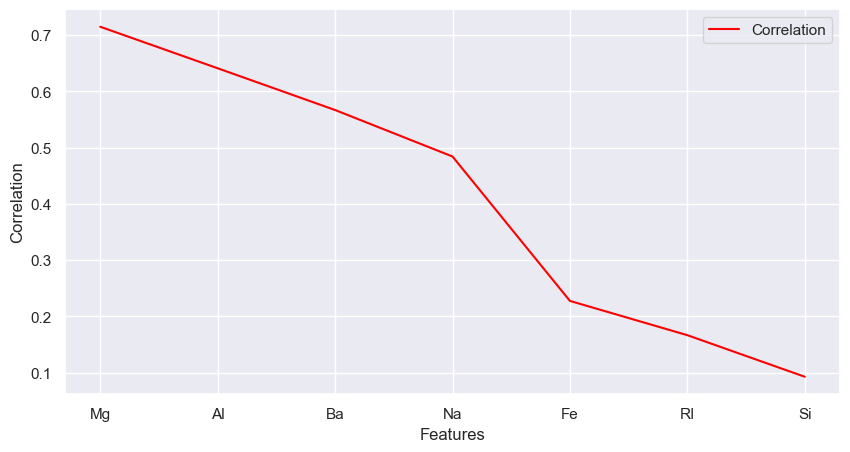

In [123]:
plt.figure(figsize=(10, 5))
corr = abs(df.corr())
plt.plot(corr['TypeOfGlass'].sort_values(ascending=False)[1:], label='Correlation', color='red')
plt.ylabel('Correlation')
plt.xlabel('Features')
plt.legend()
plt.grid(True)
plt.show()

## 5.3 Scatter plot for Top Features vs Type of Glass

In [124]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'Ba', 'Fe', 'TypeOfGlass'], dtype='object')

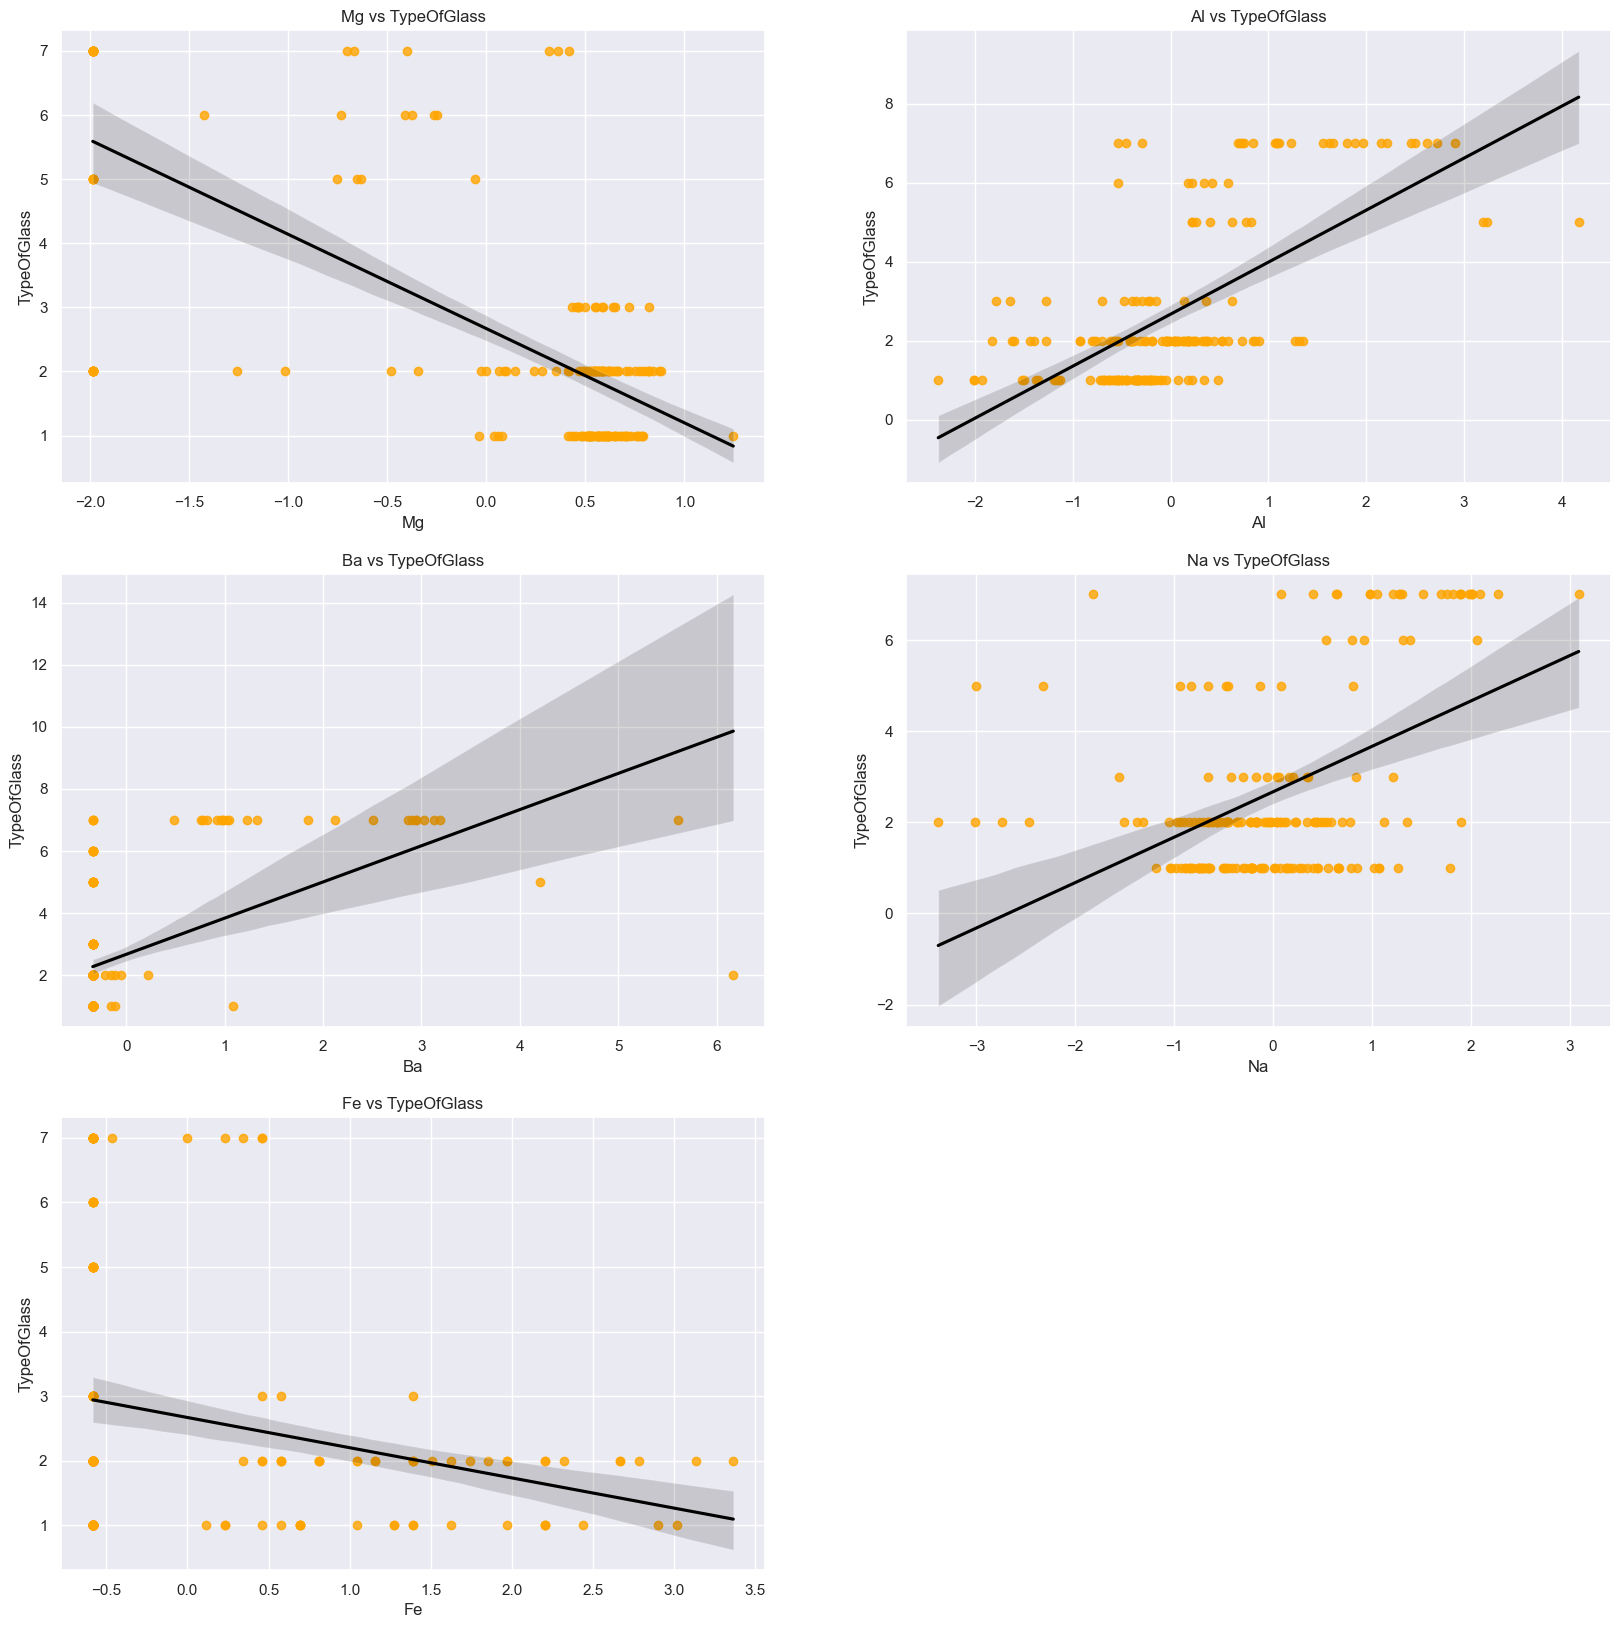

In [125]:
# Scatter plot between 'Na', 'Mg', 'Al', 'Ba', 'Fe' vs 'TypeOfGlass'
plt.figure(figsize=(20, 20))

plt.subplot(321)
sns.regplot(x=df.Mg, y=df.TypeOfGlass, scatter_kws={'color':'orange'}, line_kws={'color':'black'})
plt.title('Mg vs TypeOfGlass')

plt.subplot(322)
sns.regplot(x=df.Al, y=df.TypeOfGlass, scatter_kws={'color':'orange'}, line_kws={'color':'black'})
plt.title('Al vs TypeOfGlass')

plt.subplot(323)
sns.regplot(x=df.Ba, y=df.TypeOfGlass, scatter_kws={'color':'orange'}, line_kws={'color':'black'})
plt.title('Ba vs TypeOfGlass')

plt.subplot(324)
sns.regplot(x=df.Na, y=df.TypeOfGlass, scatter_kws={'color':'orange'}, line_kws={'color':'black'})
plt.title('Na vs TypeOfGlass')

plt.subplot(325)
sns.regplot(x=df.Fe, y=df.TypeOfGlass, scatter_kws={'color':'orange'}, line_kws={'color':'black'})
plt.title('Fe vs TypeOfGlass')

plt.show()

## 5.4 Target Column

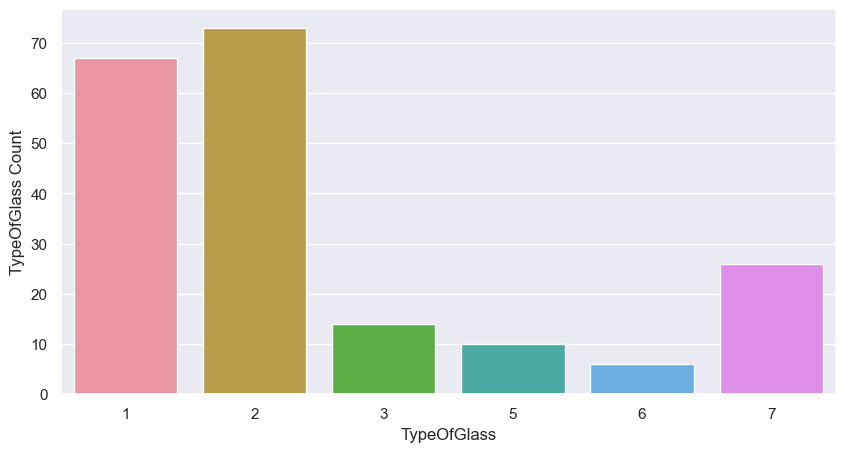

In [126]:
# Plot the popular area in Chennai (descending order) sales wise
sns.set(style='darkgrid')
sns.set_palette('hls', 3)
plt.figure(figsize=(10, 5))
sns.barplot(y = df.TypeOfGlass.value_counts(), x = df.TypeOfGlass.value_counts().index)
plt.ylabel('TypeOfGlass Count')
plt.xlabel('TypeOfGlass')
plt.show()

In [127]:
df.head()

,RI,Na,Mg,Al,Si,Ba,Fe,TypeOfGlass
0,0.890812,0.338985,1.246160,-0.722499,-1.123132,-0.339357,-0.583422,1
1,-0.224796,0.659028,0.605450,-0.192354,0.124197,-0.339357,-0.583422,1
2,-0.694007,0.198166,0.569455,0.174669,0.465571,-0.339357,-0.583422,1
3,-0.208390,-0.211490,0.670241,-0.335086,-0.033360,-0.339357,-0.583422,1
4,-0.287138,-0.134679,0.619848,-0.437037,0.583739,-0.339357,-0.583422,1


# 6. ML MODEL

In [128]:
# To tarin ML model lets split Data
X_train = df.drop('TypeOfGlass', axis=1)
Y_train = df.TypeOfGlass

In [129]:
# Read Test Data
df_test = pd.read_csv('testKNN.txt', header=None)
df_test.columns = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'TypeOfGlass']
df_test.drop(columns=['ID', 'K', 'Ca'], inplace=True)
df_test.iloc[:, :-1] = scaler(df_test.iloc[:, :-1])
X_test = df_test.drop('TypeOfGlass', axis=1)
Y_test = df_test.TypeOfGlass

In [130]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(196, 7) (18, 7)
(196,) (18,)


## 6.1 K-Nearest Neighbor (Square Euclidean)

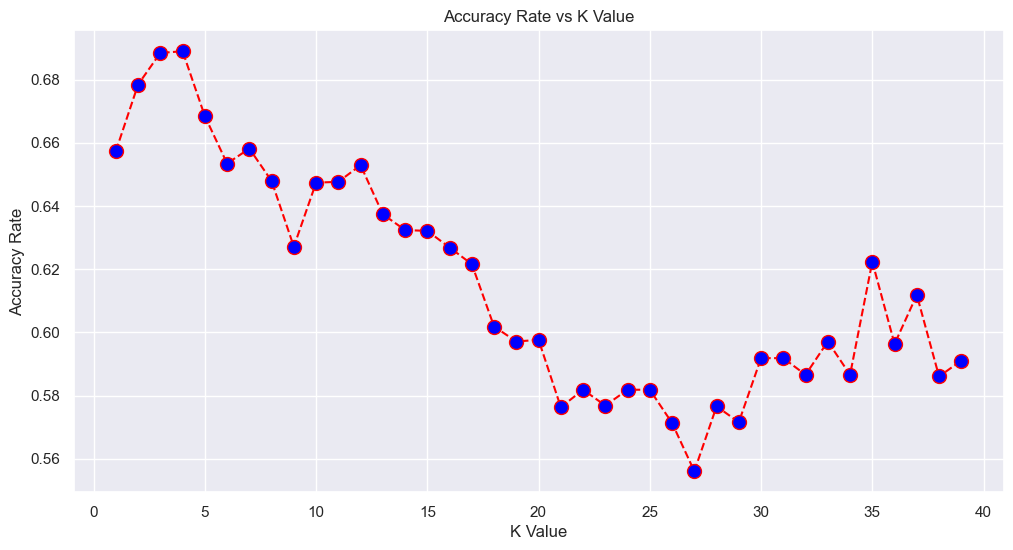

In [146]:
# Calculating error for K values between 1 and 40
accuracy = []
for i in range(1, 40):
    KNN_clf = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    KNN_clf.fit(X_train, Y_train)
    spl = StratifiedKFold(n_splits=10) 
    result = cross_val_score(KNN_clf, X_train, Y_train, cv=spl, scoring='accuracy')  
    accuracy.append(result.mean())

plt.figure(figsize = (12, 6))
plt.plot(range(1, 40), accuracy, color = 'red', linestyle = 'dashed', marker = 'o',
            markerfacecolor = 'blue', markersize = 10)
plt.title('Accuracy Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Rate')
plt.show()

In [147]:
print('K Value: ', accuracy.index(max(accuracy)), ', Accuracy: ', max(accuracy))

K Value:  3 , Accuracy:  0.6889473684210526


In [148]:
# Train model with optimal K value
KNN_clf = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
KNN_clf.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [149]:
# Prediction for all Test Data
Y_pred = KNN_clf.predict(X_test)

### 6.1.1 Accuracy Score & Classification Report

In [150]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.38      1.00      0.55         3
           2       0.33      0.67      0.44         3
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       1.00      1.00      1.00         3

    accuracy                           0.44        18
   macro avg       0.28      0.44      0.33        18
weighted avg       0.28      0.44      0.33        18



## 6.2 K-Nearest Neighbor (Manhattan Distance)

Text(0, 0.5, 'Accuracy Rate')

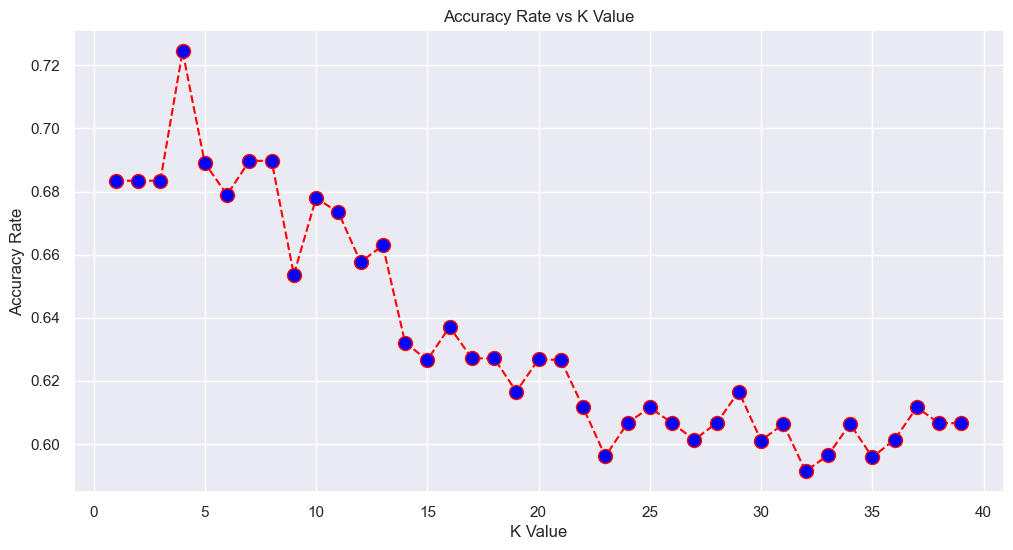

In [151]:
# Calculating error for K values between 1 and 40
accuracy = []
for i in range(1, 40):
    KNN_clf = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    KNN_clf.fit(X_train, Y_train)
    spl = StratifiedKFold(n_splits=10) # 10 splits of data
    result = cross_val_score(KNN_clf, X_train, Y_train, cv=spl, scoring='accuracy')  
    accuracy.append(result.mean())

plt.figure(figsize = (12, 6))
plt.plot(range(1, 40), accuracy, color = 'red', linestyle = 'dashed', marker = 'o',
            markerfacecolor = 'blue', markersize = 10)
plt.title('Accuracy Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Rate')

In [152]:
print('K Value: ', accuracy.index(max(accuracy)), ', Accuracy: ', max(accuracy))

K Value:  3 , Accuracy:  0.7244736842105264


In [153]:
# Train model with optimal K value
KNN_clf = KNeighborsClassifier(n_neighbors = 3, metric = 'manhattan')
KNN_clf.fit(X_train, Y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [154]:
# Prediction for all Test Data
Y_pred = KNN_clf.predict(X_test)

### 6.2.1 Accuracy Score & Classification Report

In [155]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.38      1.00      0.55         3
           2       0.17      0.33      0.22         3
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      0.33      0.50         3
           7       1.00      1.00      1.00         3

    accuracy                           0.44        18
   macro avg       0.42      0.44      0.38        18
weighted avg       0.42      0.44      0.38        18



Observation
-----------
1. Accuracy score of both Square Euclidean & Manhattan distance are same (0.44).
2. Macro average of Precision of Manhattan (0.42) is higher than Euclidean (0.28).
3. Macro average of Recall is same for both metrics.
4. Macro average of F1 score for Manhattan (0.38) is higher than Euclidean (0.33).